In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Field Generation

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

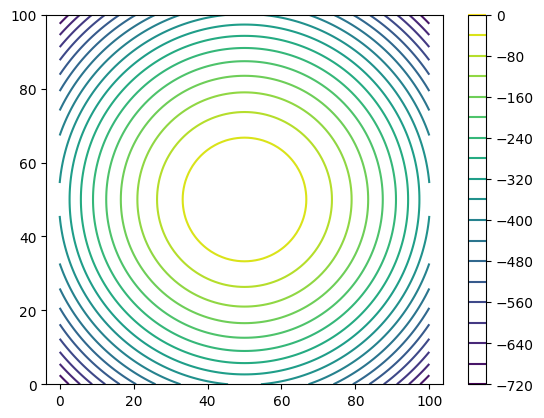

In [2]:
width=500

x_circ = np.linspace(-width // 2, width // 2, 101)  
y_circ = np.linspace(-width // 2, width // 2, 101)
X_circ, Y_circ = np.meshgrid(x_circ, y_circ)

x0_circ, y0_circ = 0, 0

A = -2/350
Psi_circ = A*( (X_circ-x0_circ)**2 + (Y_circ-y0_circ)**2 )

u_circ, v_circ = (-2*A*(Y_circ - y0_circ)).T, (2*A*(X_circ - x0_circ)).T

plt.contour(Psi_circ, 20)
plt.colorbar()
plt.axis('equal')

(np.float64(-250.0), np.float64(250.0), np.float64(-250.0), np.float64(250.0))

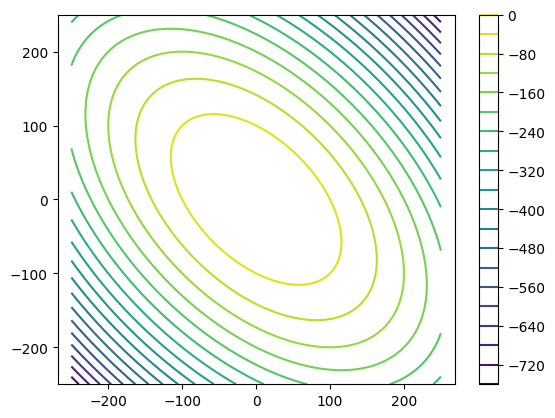

In [3]:
width=500

x_ell = np.linspace(-width // 2, width // 2, 101)  
y_ell = np.linspace(-width // 2, width // 2, 101) 
X_ell, Y_ell = np.meshgrid(x_ell, y_ell)

x0_ell, y0_ell = 0, 0

q11, q22, q12 = 2, 2, 1
A = -1/500
q11 *= A
q22 *= A
q12 *= A
Q = np.array([[q11, q12], [q12, q22]])

XY = np.stack((X_ell, Y_ell), axis=-1)  # Shape (101, 101, 2)
Psi_ell = np.einsum("...i,ij,...j->...", XY, Q, XY)

u_ell = (-2*q22*(Y_ell-y0_ell) - 2*q12*(X_ell-x0_ell)).T
v_ell =  (2*q11*(X_ell-x0_ell) + 2*q12*(Y_ell-y0_ell)).T

plt.contour(X_ell, Y_ell, Psi_ell, 20)
plt.colorbar()
plt.axis('equal')

## MOCAspace

$$
\Psi(x,y) = (\mathbf{x}-\mathbf{x_0})^T Q (\mathbf{x}-\mathbf{x_0})
$$

$$
\Psi(x,y) = q_{11}(y - y_0) - 2q_{22}(y - y_0)^2 + 2q_{12}(x - x_0)(y - y_0)
$$

$$
u = -2q_{22}(y - y_0) - 2q_{12}(x - x_0)
$$

$$
v = 2q_{11}(x - x_0) + 2q_{12}(y - y_0)
$$

$$
R = \sum \left( (u_i - u)^2 + (v_i - v)^2 \right)
$$



In [4]:
def moca_space(xi, yi, ui, vi):
    from scipy.optimize import least_squares

    def residuals(params, x, y, u_i, v_i):
        x0, y0, q11, q12, q22 = params
        u = -2 * q22 * (y - y0) - 2 * q12 * (x - x0)
        v =  2 * q11 * (x - x0) + 2 * q12 * (y - y0)
        return np.concatenate([(u - u_i), (v - v_i)])

    def fit_params(x, y, u_i, v_i):
        x0_init, y0_init = np.mean(x), np.mean(y)
        q11_init, q12_init, q22_init = 1.0, 0.0, 1.0  # Initial guesses
        params_init = [x0_init, y0_init, q11_init, q12_init, q22_init]
        result = least_squares(residuals, params_init, args=(x, y, u_i, v_i))
        return result.x 

    x0, y0, q11, q12, q22 = fit_params(xi, yi, ui, vi)

    w = 2*(q11 + q22)
    
    return x0, y0, q11, q12, q22, w

x0: 2.21328997609873e-14, y0: 4.4735252557447786e-12, q11: -0.005714285714285723, q12: -5.460569490326228e-21, q22: -0.005714285714286051


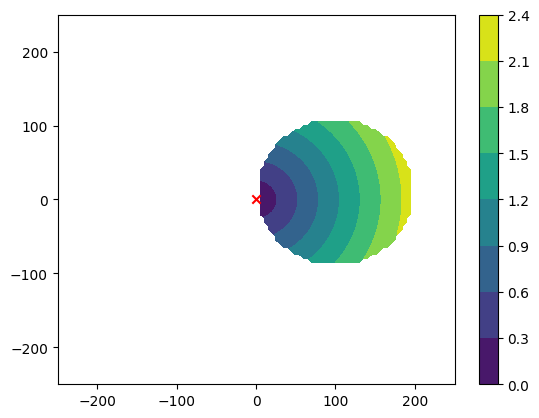

In [5]:
x_mask, y_mask = 100, 10

mask = (np.hypot(X_circ-x_mask, Y_circ-y_mask) < 100).T
cs_circ = np.hypot(u_circ, v_circ)
cs_circ = np.where(mask, cs_circ, np.nan)

plt.contourf(x_circ, y_circ, cs_circ.T)
plt.colorbar()

ui_circ = u_circ.T[mask]
vi_circ = v_circ.T[mask]
xi_circ = X_circ[mask]
yi_circ = Y_circ[mask]

x0_circ, y0_circ, q11_circ, q12_circ, q22_circ, w_circ = moca_space(xi_circ, yi_circ, ui_circ, vi_circ)
print(f"x0: {x0_circ}, y0: {y0_circ}, q11: {q11_circ}, q12: {q12_circ}, q22: {q22_circ}")

plt.scatter(x0_circ, y0_circ, color='r', marker='x')


x0: 7.216602762115301e-16, y0: 6.0475279314632094e-15, q11: -0.005714285714285714, q12: -1.6519652590295202e-21, q22: -0.005714285714285715


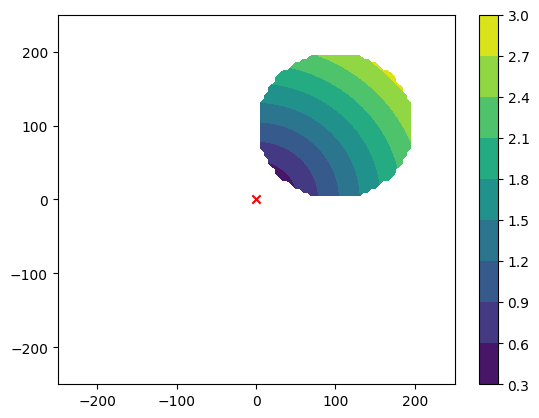

In [6]:
x_mask, y_mask = 100, 100

mask = (np.hypot(X_circ-x_mask, Y_circ-y_mask) < 100).T
cs_circ = np.hypot(u_circ, v_circ)
cs_circ = np.where(mask, cs_circ, np.nan)

plt.contourf(x_circ, y_circ, cs_circ.T)
plt.colorbar()

ui_circ = u_circ.T[mask]
vi_circ = v_circ.T[mask]
xi_circ = X_circ[mask]
yi_circ = Y_circ[mask]

x0_circ, y0_circ, q11_circ, q12_circ, q22_circ, w_circ = moca_space(xi_circ, yi_circ, ui_circ, vi_circ)
print(f"x0: {x0_circ}, y0: {y0_circ}, q11: {q11_circ}, q12: {q12_circ}, q22: {q22_circ}")

plt.scatter(x0_circ, y0_circ, color='r', marker='x')


x0: 6.754051960113495e-14, y0: 1.3677364650604333e-13, q11: -0.004000000000000002, q12: -0.0020000000000000035, q22: -0.003999999999999998
x0: -7.70962952463954e-15, y0: 2.064372990226604e-14, q11: -0.004000000000000002, q12: -0.0020000000000000005, q22: -0.004
x0: -6.045774779489667e-15, y0: 1.1526371049335291e-14, q11: -0.004, q12: -0.002, q22: -0.004
x0: -1.929793150438036e-13, y0: 1.591190179702836e-13, q11: -0.004000000000000002, q12: -0.0020000000000000013, q22: -0.004000000000000004


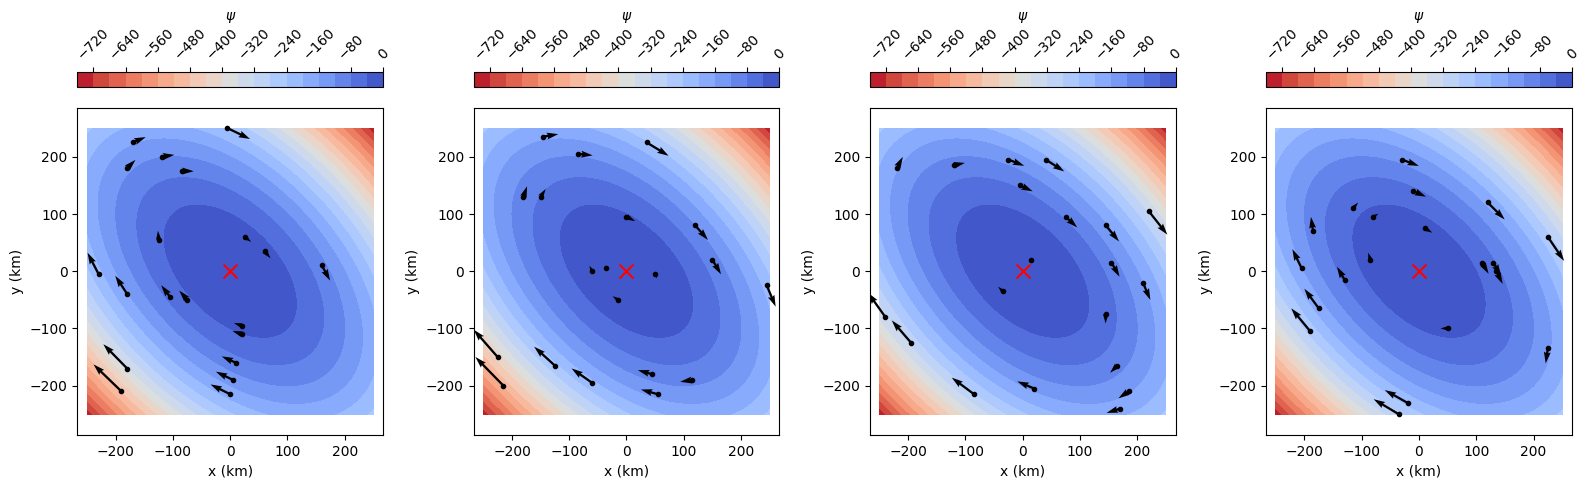

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

for ax in axs:
    random_indices = np.random.choice(u_ell.shape[0] * u_ell.shape[1], size=20, replace=False)

    row_indices, col_indices = np.unravel_index(random_indices, u_ell.shape)

    ui = u_ell.T[row_indices, col_indices]
    vi = v_ell.T[row_indices, col_indices]
    xi = X_ell[row_indices, col_indices]
    yi = Y_ell[row_indices, col_indices]

    # cs = np.hypot(u_ell, v_ell)
    c = ax.contourf(x_ell, y_ell, Psi_ell.T, cmap='coolwarm_r', levels=20)

    ax.scatter(xi, yi, color='k', marker='.')
    ax.quiver(xi, yi, ui, vi, color='k')

    x0, y0, q11, q12, q22, w = moca_space(xi, yi, ui, vi)
    print(f"x0: {x0}, y0: {y0}, q11: {q11}, q12: {q12}, q22: {q22}")

    ax.scatter(x0, y0, color='r', marker='x', s=100)

    ax.axis('equal')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')


    cbar = fig.colorbar(c, ax=ax, orientation='horizontal', location='top', label=r'$\psi$')
    cbar.ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



## Modelled Eddy



In [8]:
def calculate_eddy(width=500000, L=1e5, f0=None, rho0=1025, q11=1., q22=1., q12=0.):
    if f0 is None:
        f0 = 2 * 7.29E-5 * np.sin(np.radians(-34))
    g = 9.81
    x = np.linspace(-width // 2, width // 2, 101)
    y = np.linspace(-width // 2, width // 2, 101)
    x_2d, y_2d = np.meshgrid(x, y, indexing='ij')
    
    x_c = 0
    y_c = 0

    X = np.stack([x_2d - x_c, y_2d - y_c], axis=0) 
    Q = np.array([[q11, q12], [q12, q22]]) 
    
    r_c = np.sqrt(np.einsum('i...,ij,j...->...', X, Q, X))

    sigma = -2 * np.exp(-r_c**2 / L**2)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    d_sigma_dx = np.gradient(sigma, axis=0) / dx
    d_sigma_dy = np.gradient(sigma, axis=1) / dy
    
    U = -g / f0 * d_sigma_dy
    V = g / f0 * d_sigma_dx
    
    return U, V, x/1000, y/1000

u, v, x, y = calculate_eddy()
X, Y, dx = *np.meshgrid(x, y), x[1]-x[0]


x0: -7.103072890631454, y0: 6.958778280736619, q11: -0.0007310470234053469, q12: -1.0699036913787186e-05, q22: -0.0007997927997727669
x0: 23.73467512118553, y0: 5.98106280074867, q11: -0.0006714177060676403, q12: -4.8643768867682115e-05, q22: -0.0006324096196893782
x0: -8.633440341685432, y0: 13.784723089764235, q11: -0.0006908915048627549, q12: 5.8785933816869195e-05, q22: -0.0006705636913822642
x0: -5.9526131738274985, y0: 23.021604605864272, q11: -0.0006830374183310256, q12: 5.594831452218342e-05, q22: -0.0007189120029041073


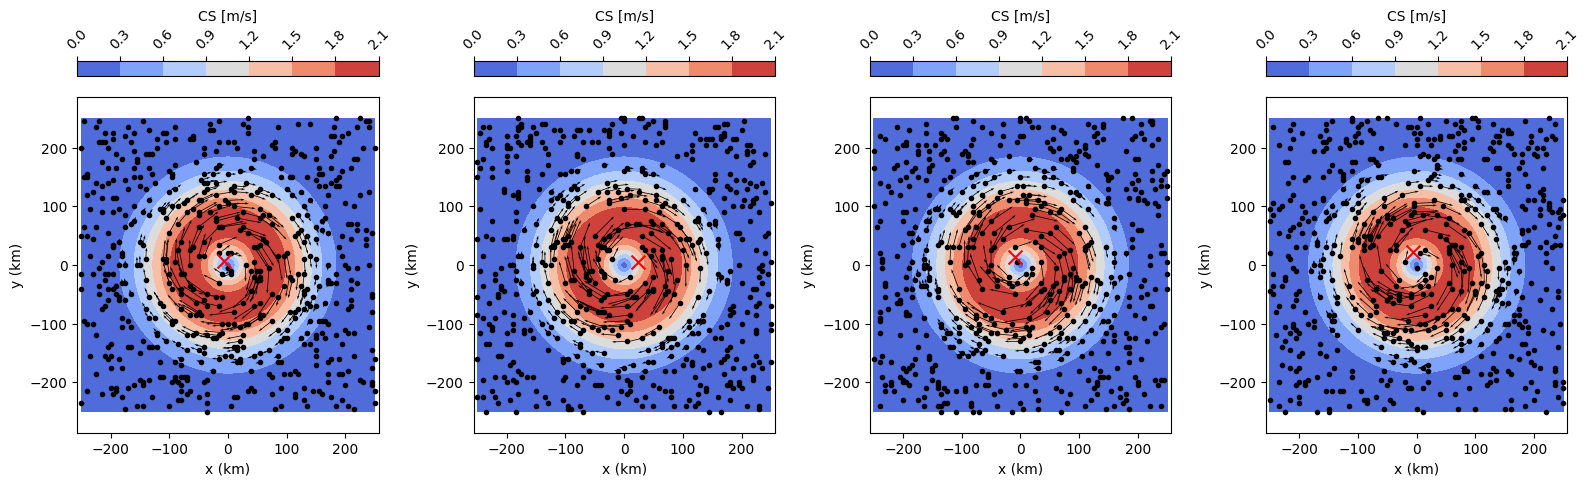

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

for ax in axs:
    random_indices = np.random.choice(u_ell.shape[0] * u_ell.shape[1], size=600, replace=False)

    row_indices, col_indices = np.unravel_index(random_indices, u_ell.shape)

    ui = u.T[row_indices, col_indices]
    vi = v.T[row_indices, col_indices]
    xi = X[row_indices, col_indices]
    yi = Y[row_indices, col_indices]

    cs = np.hypot(u, v)
    c = ax.contourf(x_ell, y_ell, cs.T, cmap='coolwarm')

    ax.scatter(xi, yi, color='k', marker='.')
    ax.quiver(xi, yi, ui, vi, color='k')

    x0, y0, q11, q12, q22, w = moca_space(xi, yi, ui, vi)
    print(f"x0: {x0}, y0: {y0}, q11: {q11}, q12: {q12}, q22: {q22}")

    ax.scatter(x0, y0, color='r', marker='x', s=100)

    ax.axis('equal')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')


    cbar = fig.colorbar(c, ax=ax, orientation='horizontal', location='top', label='CS [m/s]')
    cbar.ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

x0: 0.381695528896242, y0: 3.2762497277965763, q11: -0.012849245017134216, q12: 0.0007697245454331849, q22: -0.012920463156478188
x0: 5.9322824593728845, y0: 4.399792604939169, q11: -0.012669304037954746, q12: 0.00023123041546350607, q22: -0.011848184634781517
x0: 6.170407771813981, y0: -4.926936451869337, q11: -0.012303512162690246, q12: 0.00040550401736541, q22: -0.012973679504782308
x0: -0.7426706686026877, y0: -3.384868726916584, q11: -0.013009237698245111, q12: 0.0006821725445383683, q22: -0.015167267889076186


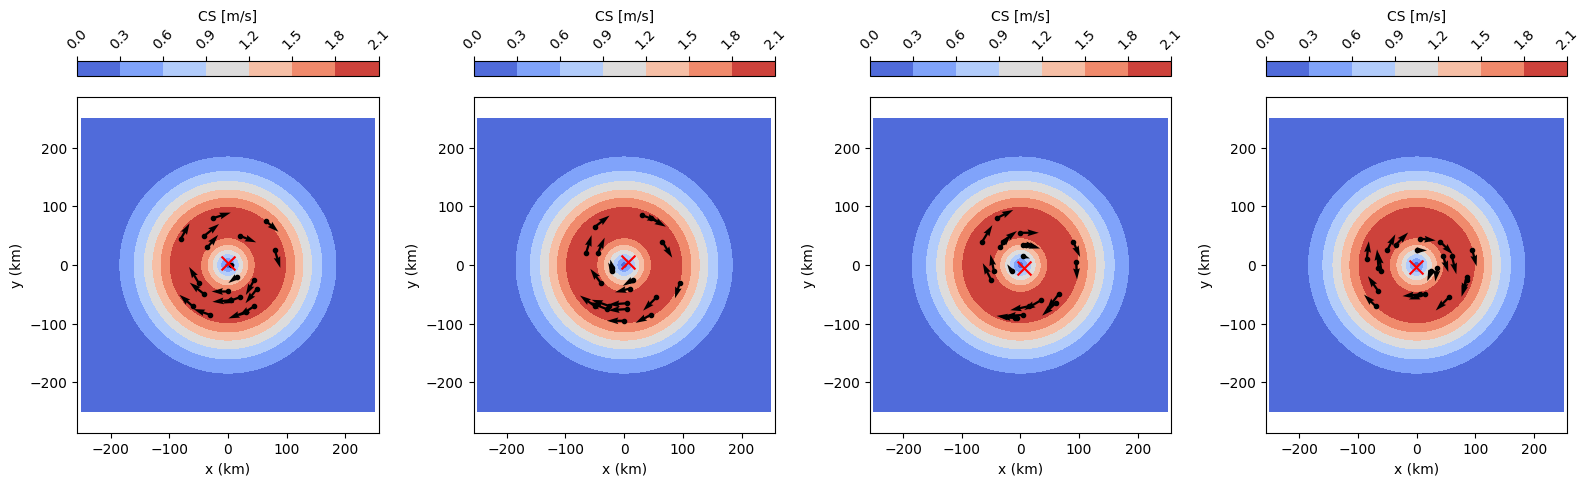

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

for ax in axs:
    
    x_search, y_search = 0, 0
    mask = np.hypot(X - x_search, Y - y_search) < 100
    valid_indices = np.argwhere(mask == 1)  # Get row, col indices of valid points

    selected_indices = valid_indices[np.random.choice(valid_indices.shape[0], size=20, replace=False)]

    row_indices, col_indices = selected_indices[:, 0], selected_indices[:, 1]

    ui = u.T[row_indices, col_indices]
    vi = v.T[row_indices, col_indices]
    xi = X[row_indices, col_indices]
    yi = Y[row_indices, col_indices]

    cs = np.hypot(u, v)
    c = ax.contourf(x_ell, y_ell, cs.T, cmap='coolwarm')

    ax.scatter(xi, yi, color='k', marker='.')
    ax.quiver(xi, yi, ui, vi, color='k')

    x0, y0, q11, q12, q22, w = moca_space(xi, yi, ui, vi)
    print(f"x0: {x0}, y0: {y0}, q11: {q11}, q12: {q12}, q22: {q22}")

    ax.scatter(x0, y0, color='r', marker='x', s=100)

    ax.axis('equal')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')


    cbar = fig.colorbar(c, ax=ax, orientation='horizontal', location='top', label='CS [m/s]')
    cbar.ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

# Elliptical Vortex

In [11]:
u, v, _, _ = calculate_eddy(q11=2, q22=2, q12=1)

In [12]:
%%capture

df_error = pd.DataFrame(columns=['Boundary', 'i', 'j', 'r', 'xc', 'yc', 'Error'])

for boundary in [35, 40, 45]:
    for i in range(boundary, u.shape[0] - boundary, 2):
        for j in range(boundary, u.shape[1] - boundary, 2):
    
            for r_rel in [2, 5, 10, 20]:

                mask = (np.hypot(X - X[i, j], Y - Y[i, j]) < r_rel).T
                xi, yi = X[mask], Y[mask]
                ui, vi = u.T[mask], v.T[mask]
                
                x0_rel, y0_rel, _, _, _, _ = moca_space(xi, yi, ui, vi)

                err = np.hypot(x0_rel, y0_rel)
        
                df_error.loc[len(df_error)] = {'Boundary': boundary, 'i': i, 'j': j, 'r': r_rel, 'xc': x0_rel, 'yc': y0_rel, 'Error': err}
            

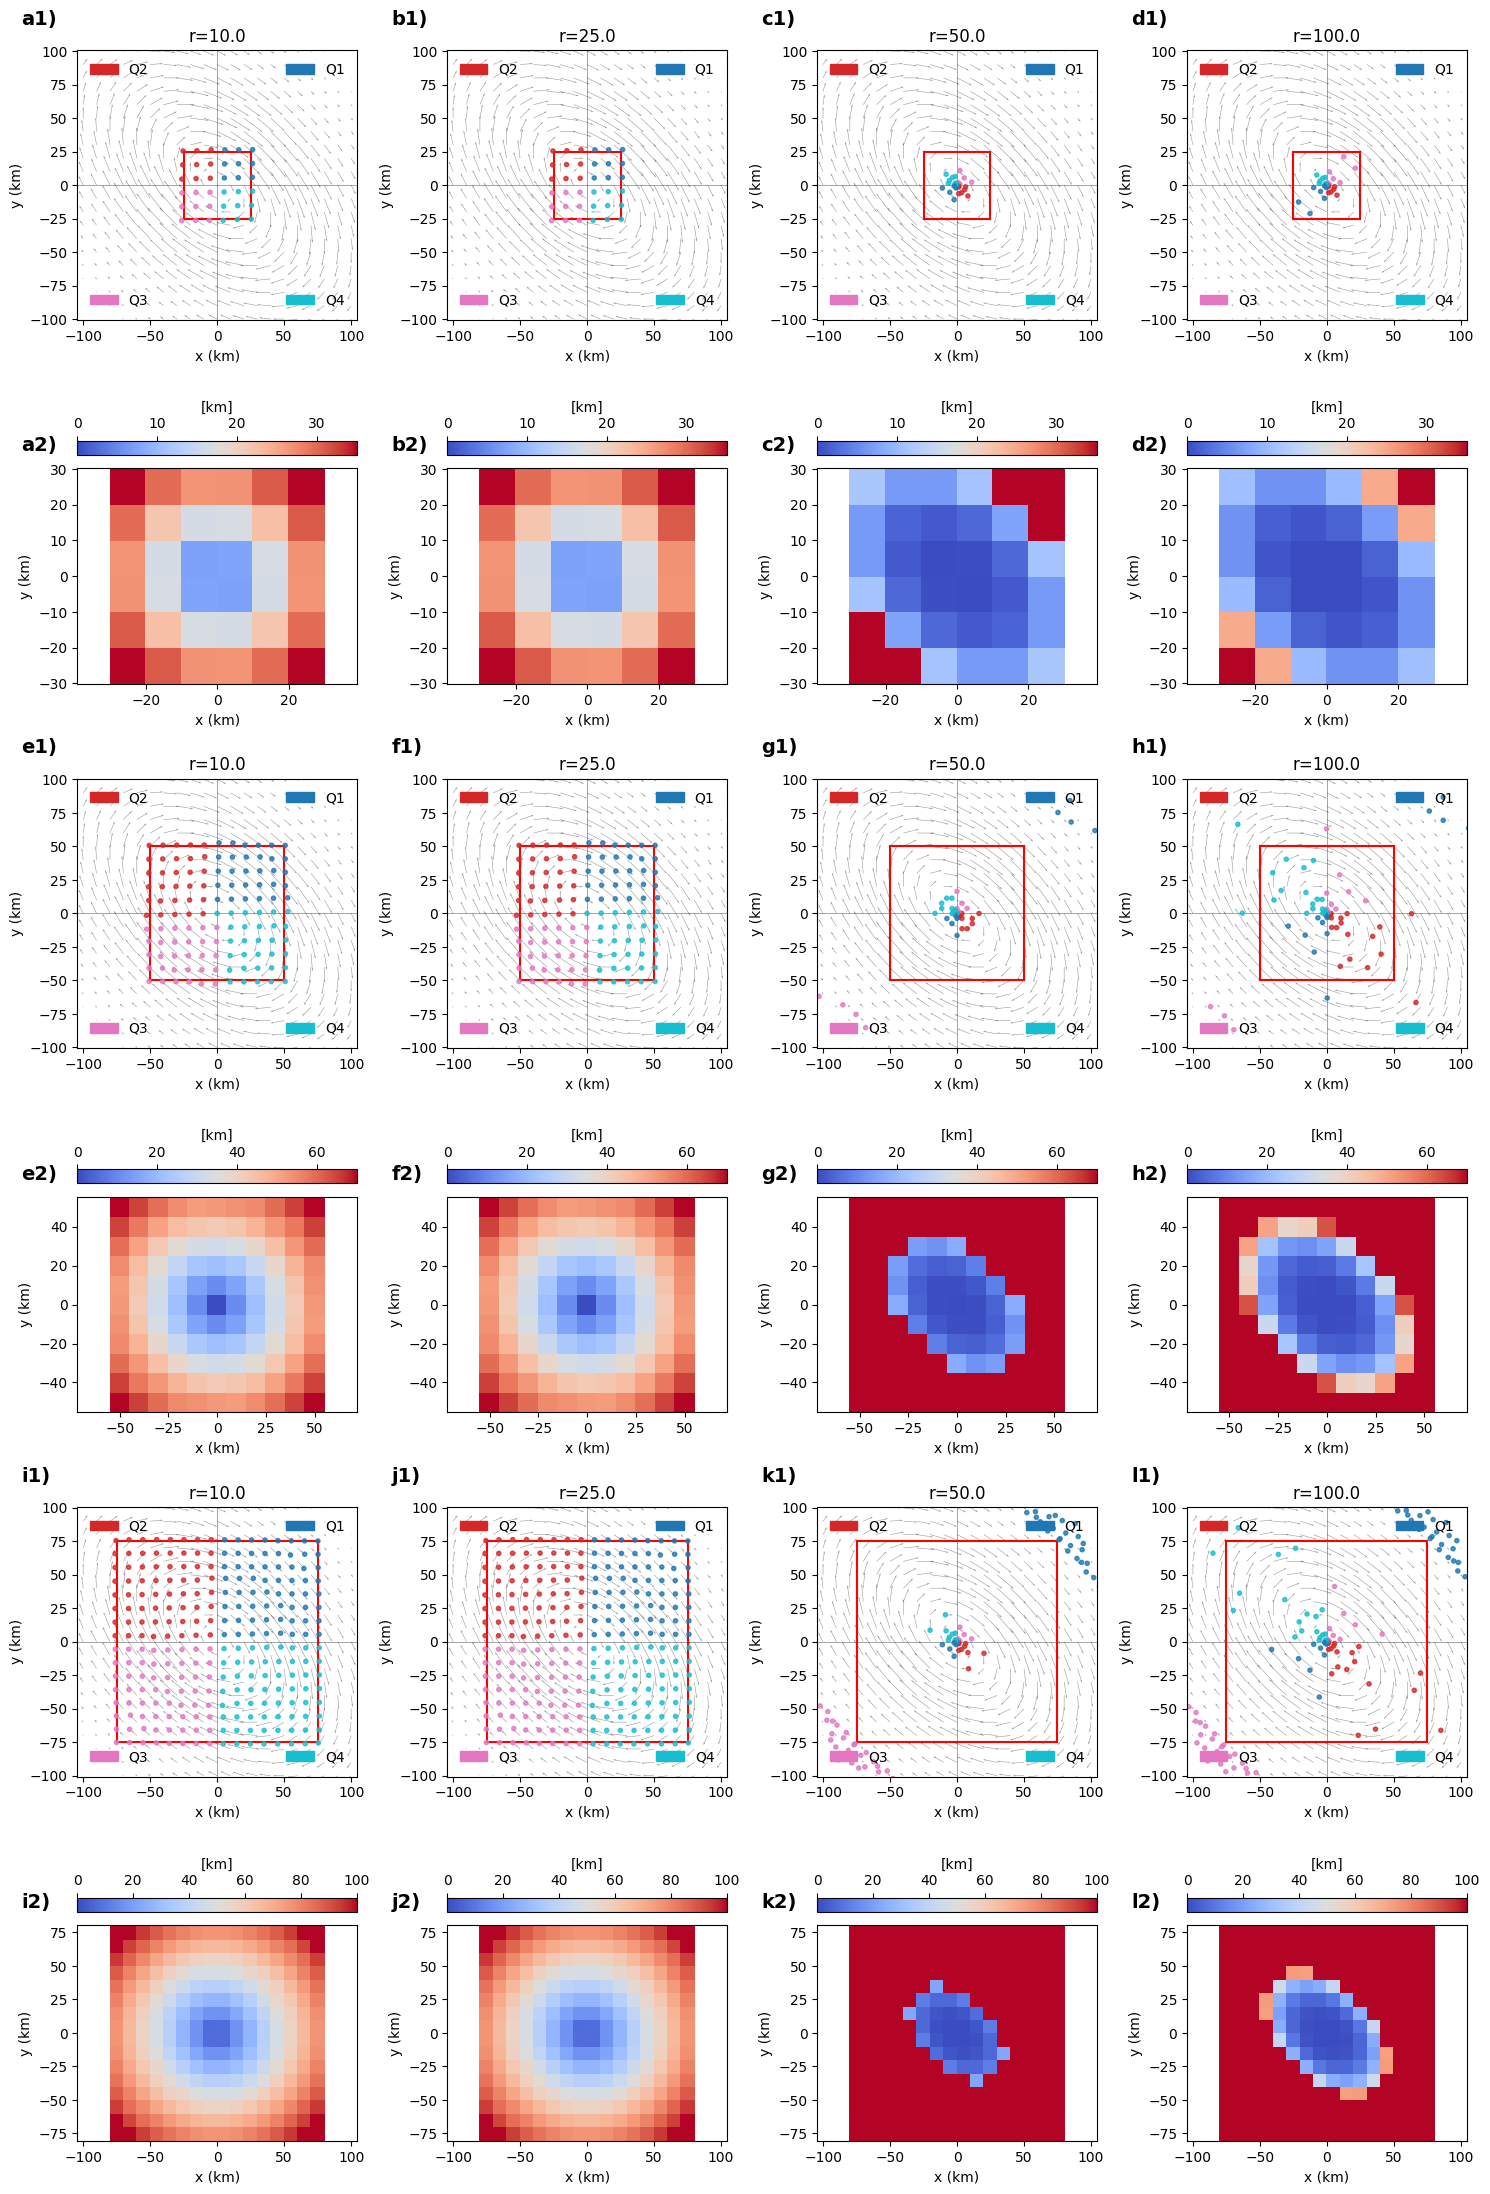

In [13]:
import matplotlib.patches as mpatches

fig, axs = plt.subplots(6, 4, figsize=(15,22))

tgs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

spacing, scale, width = 2, 40, 0.002

vmaxs = [35, 70, 100]
dx = x[1] - x[0]
for i, r_check in enumerate([2, 5, 10, 20]):

    for j, boundary in enumerate(np.flip(df_error['Boundary'].unique())):    
    
        axs[2*j,i].quiver(x[::spacing], y[::spacing], u[::spacing, ::spacing].T, v[::spacing, ::spacing].T, 
                   alpha=0.4, scale=scale, width=width, zorder=0)
    
        axs[2*j,i].plot([x[boundary], x[u.shape[0] - boundary - 1]], [y[u.shape[1] - boundary - 1], y[u.shape[1] - boundary - 1]], 'r', zorder=1)
        axs[2*j,i].plot([x[boundary], x[u.shape[0] - boundary - 1]], [y[boundary], y[boundary]], 'r', zorder=1)
        axs[2*j,i].plot([x[boundary], x[boundary]], [y[boundary], y[u.shape[1] - boundary - 1]], 'r', zorder=1)
        axs[2*j,i].plot([x[u.shape[0] - boundary - 1], x[u.shape[0] - boundary - 1]], [y[boundary], y[u.shape[1] - boundary - 1]], 'r', zorder=1)
        
        df_rel = df_error.loc[(df_error['r'] == r_check) & (df_error['Boundary'] == boundary)].copy()
    
        def get_quadrant(i, j, center):
            if i >= center[0] and j > center[1]:
                return 1  # Top-right
            elif i < center[0] and j >= center[1]:
                return 2  # Top-left
            elif i <= center[0] and j < center[1]:
                return 3  # Bottom-left
            else:
                return 4  # Bottom-right
        
        df_rel['Q'] = df_rel.apply(lambda row: get_quadrant(row['i'], row['j'], (u.shape[0]//2, v.shape[1]//2)), axis=1)
    
        # Define legend locations
        legend_locs = {1: 'upper right', 2: 'upper left', 3: 'lower left', 4: 'lower right'}
        scatter = axs[2*j, i].scatter(df_rel['xc'], df_rel['yc'], c=df_rel['Q'], marker='.', zorder=2, cmap='tab10', alpha=.8)
        unique_q = np.append(df_rel['Q'].unique(),0)
        for q in unique_q:
            if q in legend_locs:
                handle = mpatches.Patch(color=scatter.cmap(scatter.norm(q)), label=f'Q{q}')
                legend = axs[2*j, i].legend(handles=[handle], loc=legend_locs[q], frameon=False)
                axs[2*j, i].add_artist(legend)  # Keep adding legends instead of replacing
            else:
                handle = mpatches.Patch(color=scatter.cmap(scatter.norm(q)), label=f'Q{q}')
                legend = axs[2*j, i].legend(handles=[handle], loc='upper center', frameon=False)
                legend.set_visible(False)

        axs[2*j,i].axhline(y=0, color='k', zorder=-1, linewidth=.5, alpha=.5)
        axs[2*j,i].axvline(x=0, color='k', zorder=-1, linewidth=.5, alpha=.5)
        
        axs[2*j,i].axis('equal')
        axs[2*j,i].set_xlim(-100, 100)
        axs[2*j,i].set_ylim(-100, 100)
        axs[2*j,i].set_title(f'r={r_check*dx}')
        axs[2*j,i].set_xlabel('x (km)')
        axs[2*j,i].set_ylabel('y (km)')

        axs[2*j,i].text(-0.2, 1.15, tgs[4*j+i]+'1)', transform=axs[2*j,i].transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
        # plot2
        
        x_unique = np.unique(x[df_rel['i']])
        y_unique = np.unique(y[df_rel['j']])
        
        z_2d = np.full((len(y_unique), len(x_unique)), np.nan)
        
        # Fill the 2D z array with the corresponding z values
        for xi, yi, zi in zip(x[df_rel['i']], y[df_rel['j']], df_rel['Error']):
            x_idx = np.where(x_unique == xi)[0][0]
            y_idx = np.where(y_unique == yi)[0][0]
            z_2d[y_idx, x_idx] = zi
        
        pcl = axs[2*j+1,i].pcolor(x_unique, y_unique, z_2d, vmin=0, vmax=vmaxs[j], cmap='coolwarm')
        cbar = plt.colorbar(pcl, ax=axs[2*j+1, i], orientation='horizontal', location='top', label='[km]')
        axs[2*j+1,i].axis('equal')
    
        axs[2*j+1,i].set_xlabel('x (km)')
        axs[2*j+1,i].set_ylabel('y (km)')

        axs[2*j+1,i].text(-0.2, 1.15, tgs[4*j+i]+'2)', transform=axs[2*j+1,i].transAxes, fontsize=14, fontweight='bold', va='top', ha='left')
    
plt.tight_layout()
plt.show()

### ROMS

In [14]:
import pickle
with open('/home/z5297792/UNSW-MRes/MRes/Climatology/ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('/home/z5297792/UNSW-MRes/MRes/Climatology/ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

with open('/srv/scratch/z5297792/Sample/frontier_sample_data.pkl', 'rb') as file:
    sample_data = pickle.load(file)
the_frontier_eddies = list(sample_data.keys())

In [15]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho'][:]
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho'][:]
lat_rho = np.transpose(lat_rho, axes=(1, 0))
z_r = np.load('/home/z5297792/UNSW-MRes/MRes/z_r/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))

import re
def extract_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else None

In [16]:
df_MOCA = pd.DataFrame(columns=['Eddy', 'Day', 'xc', 'yc', 'nic', 'njc', 'z', 'Depth', 'w'])
for eddy in the_frontier_eddies:

    var = 1 if eddies[eddy].iloc[0]['Vort'] > 0 else -1 # 1 for anti-cyclone

    for t in range(30): 

        U = sample_data[eddy]['T'+str(t)]['U']
        V = sample_data[eddy]['T'+str(t)]['V']
        
        x, y = sample_data[eddy]['T'+str(t)]['x']/1000, sample_data[eddy]['T'+str(t)]['y']/1000
        X, Y, dx = *np.meshgrid(x, y), x[1]-x[0]

        xc_pre, yc_pre = 0, 0
        nic, njc = u.shape[0]//2, u.shape[1]//2
        r = 5 #dx =5km
        for depth_lvl in range(21):

            if not (r <= nic < u.shape[0] - r and r <= njc < u.shape[1] - r):
                break

            u, v = U[:, :, depth_lvl], V[:,:, depth_lvl]

            mask = (np.hypot(X - X[nic, njc], Y - Y[nic, njc]) < r*dx).T
            xi, yi = X[mask], Y[mask]
            ui, vi = u.T[mask], v.T[mask]

            xc, yc, q11, q12, q22, w = moca_space(xi, yi, ui, vi)

            if not np.isnan(xc) and np.sign(var) == np.sign(w):
                R = np.hypot(xc - xc_pre, yc - yc_pre)
                if R < 50:
                    df_MOCA.loc[len(df_MOCA)] = {'Eddy': eddy, 'Day': t, 'xc': xc, 'yc': yc, 'nic': nic, 'njc': njc, 'z': depth_lvl, 'Depth': z_r[150, 150, depth_lvl], 'w': w}
                    xc_pre, yc_pre = xc, yc

                    nic = np.abs(x - xc).argmin()
                    njc = np.abs(y - yc).argmin()
                    
                else:
                    break
            else:
                break

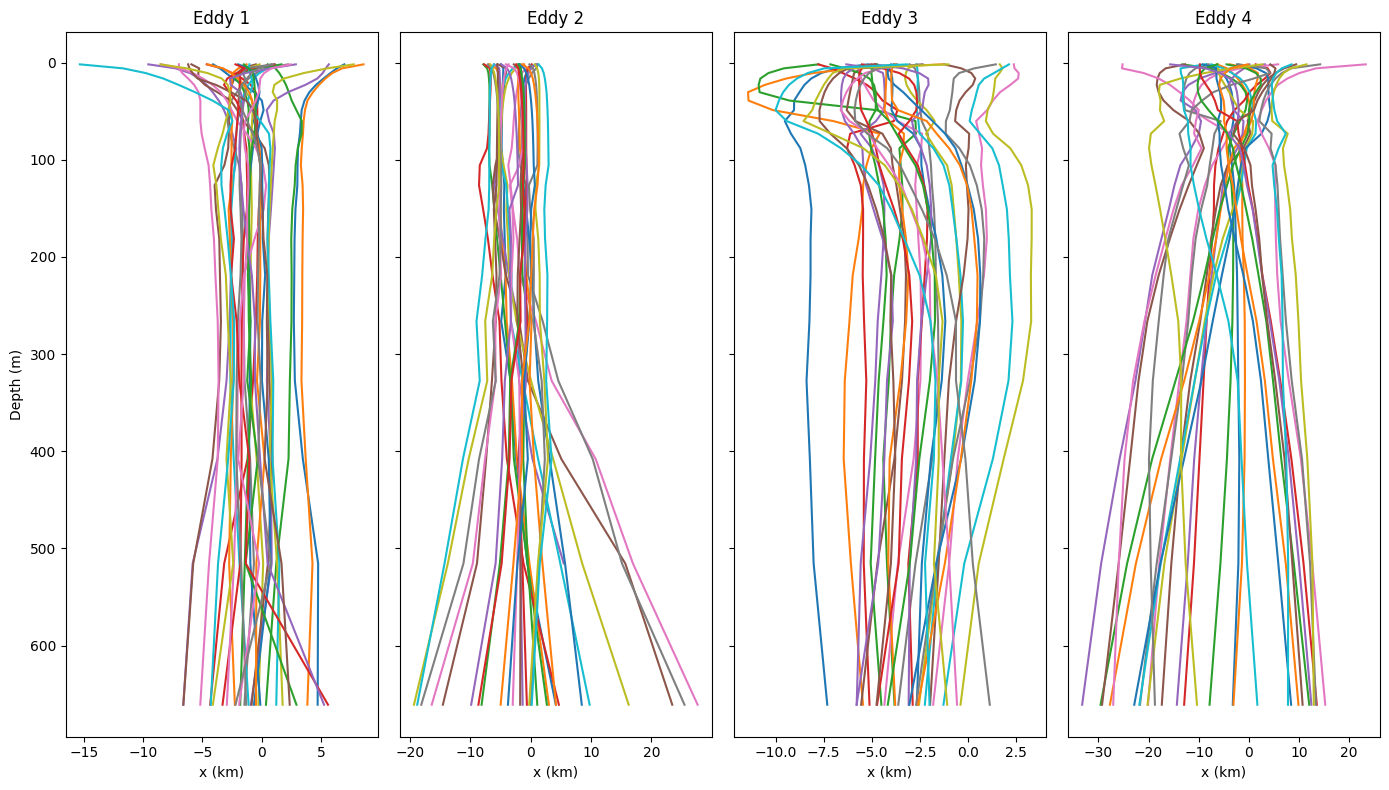

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(14,8), sharey=True)

for i, eddy in enumerate(the_frontier_eddies):

    for t in range(0, 30):
    
        df = df_MOCA[(df_MOCA['Eddy']==eddy) & (df_MOCA['Day']==t)]
        axs[i].plot(df['xc'], -df['Depth'])
        
    axs[i].set_title(f'Eddy {i+1}')
    
    axs[i].set_xlabel('x (km)')
    axs[i].set_xlabel('x (km)')
axs[0].set_ylabel('Depth (m)')
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()

plt.tight_layout()
plt.show()


### Plotting

In [18]:
eddy1 = [the_frontier_eddies[0]] * 3 
t1 = [0, 5, 15, 25, 29]
z1 = [3, 0, 3, 20, 0]

eddy2 = [the_frontier_eddies[1]] * 9
t2 = [0, 10, 10, 10, 10, 20, 29]
z2 = [20, 3, 15, 20, 5, 5, 20]

eddy3 = [the_frontier_eddies[2]] * 14
t3 = [0, 5, 10, 10, 15, 15, 15, 25, 25, 25, 25, 25, 29, 29]
z3 = [5, 0, 5, 15, 0, 3, 9, 0, 3, 9, 15, 20, 15, 20]

eddy4 = [the_frontier_eddies[3]] * 10
t4 = [0, 0, 0, 5, 10, 10, 15, 20, 20, 29]
z4 = [5, 8, 20, 20, 3, 20, 20, 8, 20, 20]

df_show_offs = pd.DataFrame({
    'Eddy': eddy1 + eddy2 + eddy3 + eddy4,
    'Day': t1 + t2 + t3 + t4,
    'z': z1 + z2 + z3 + z4
    })

df_show_offs

Eddy  Day   z
0   Eddy790    0   3
1   Eddy790    5   0
2   Eddy790   15   3
3   Eddy110   25  20
4   Eddy110   29   0
5   Eddy110    0  20
6   Eddy110   10   3
7   Eddy110   10  15
8   Eddy110   10  20
9   Eddy110   10   5
10  Eddy110   20   5
11  Eddy110   29  20
12  Eddy134    0   5
13  Eddy134    5   0
14  Eddy134   10   5
15  Eddy134   10  15
16  Eddy134   15   0
17  Eddy134   15   3
18  Eddy134   15   9
19  Eddy134   25   0
20  Eddy134   25   3
21  Eddy134   25   9
22  Eddy134   25  15
23  Eddy134   25  20
24  Eddy134   29  15
25  Eddy134   29  20
26  Eddy775    0   5
27  Eddy775    0   8
28  Eddy775    0  20
29  Eddy775    5  20
30  Eddy775   10   3
31  Eddy775   10  20
32  Eddy775   15  20
33  Eddy775   20   8
34  Eddy775   20  20
35  Eddy775   29  20

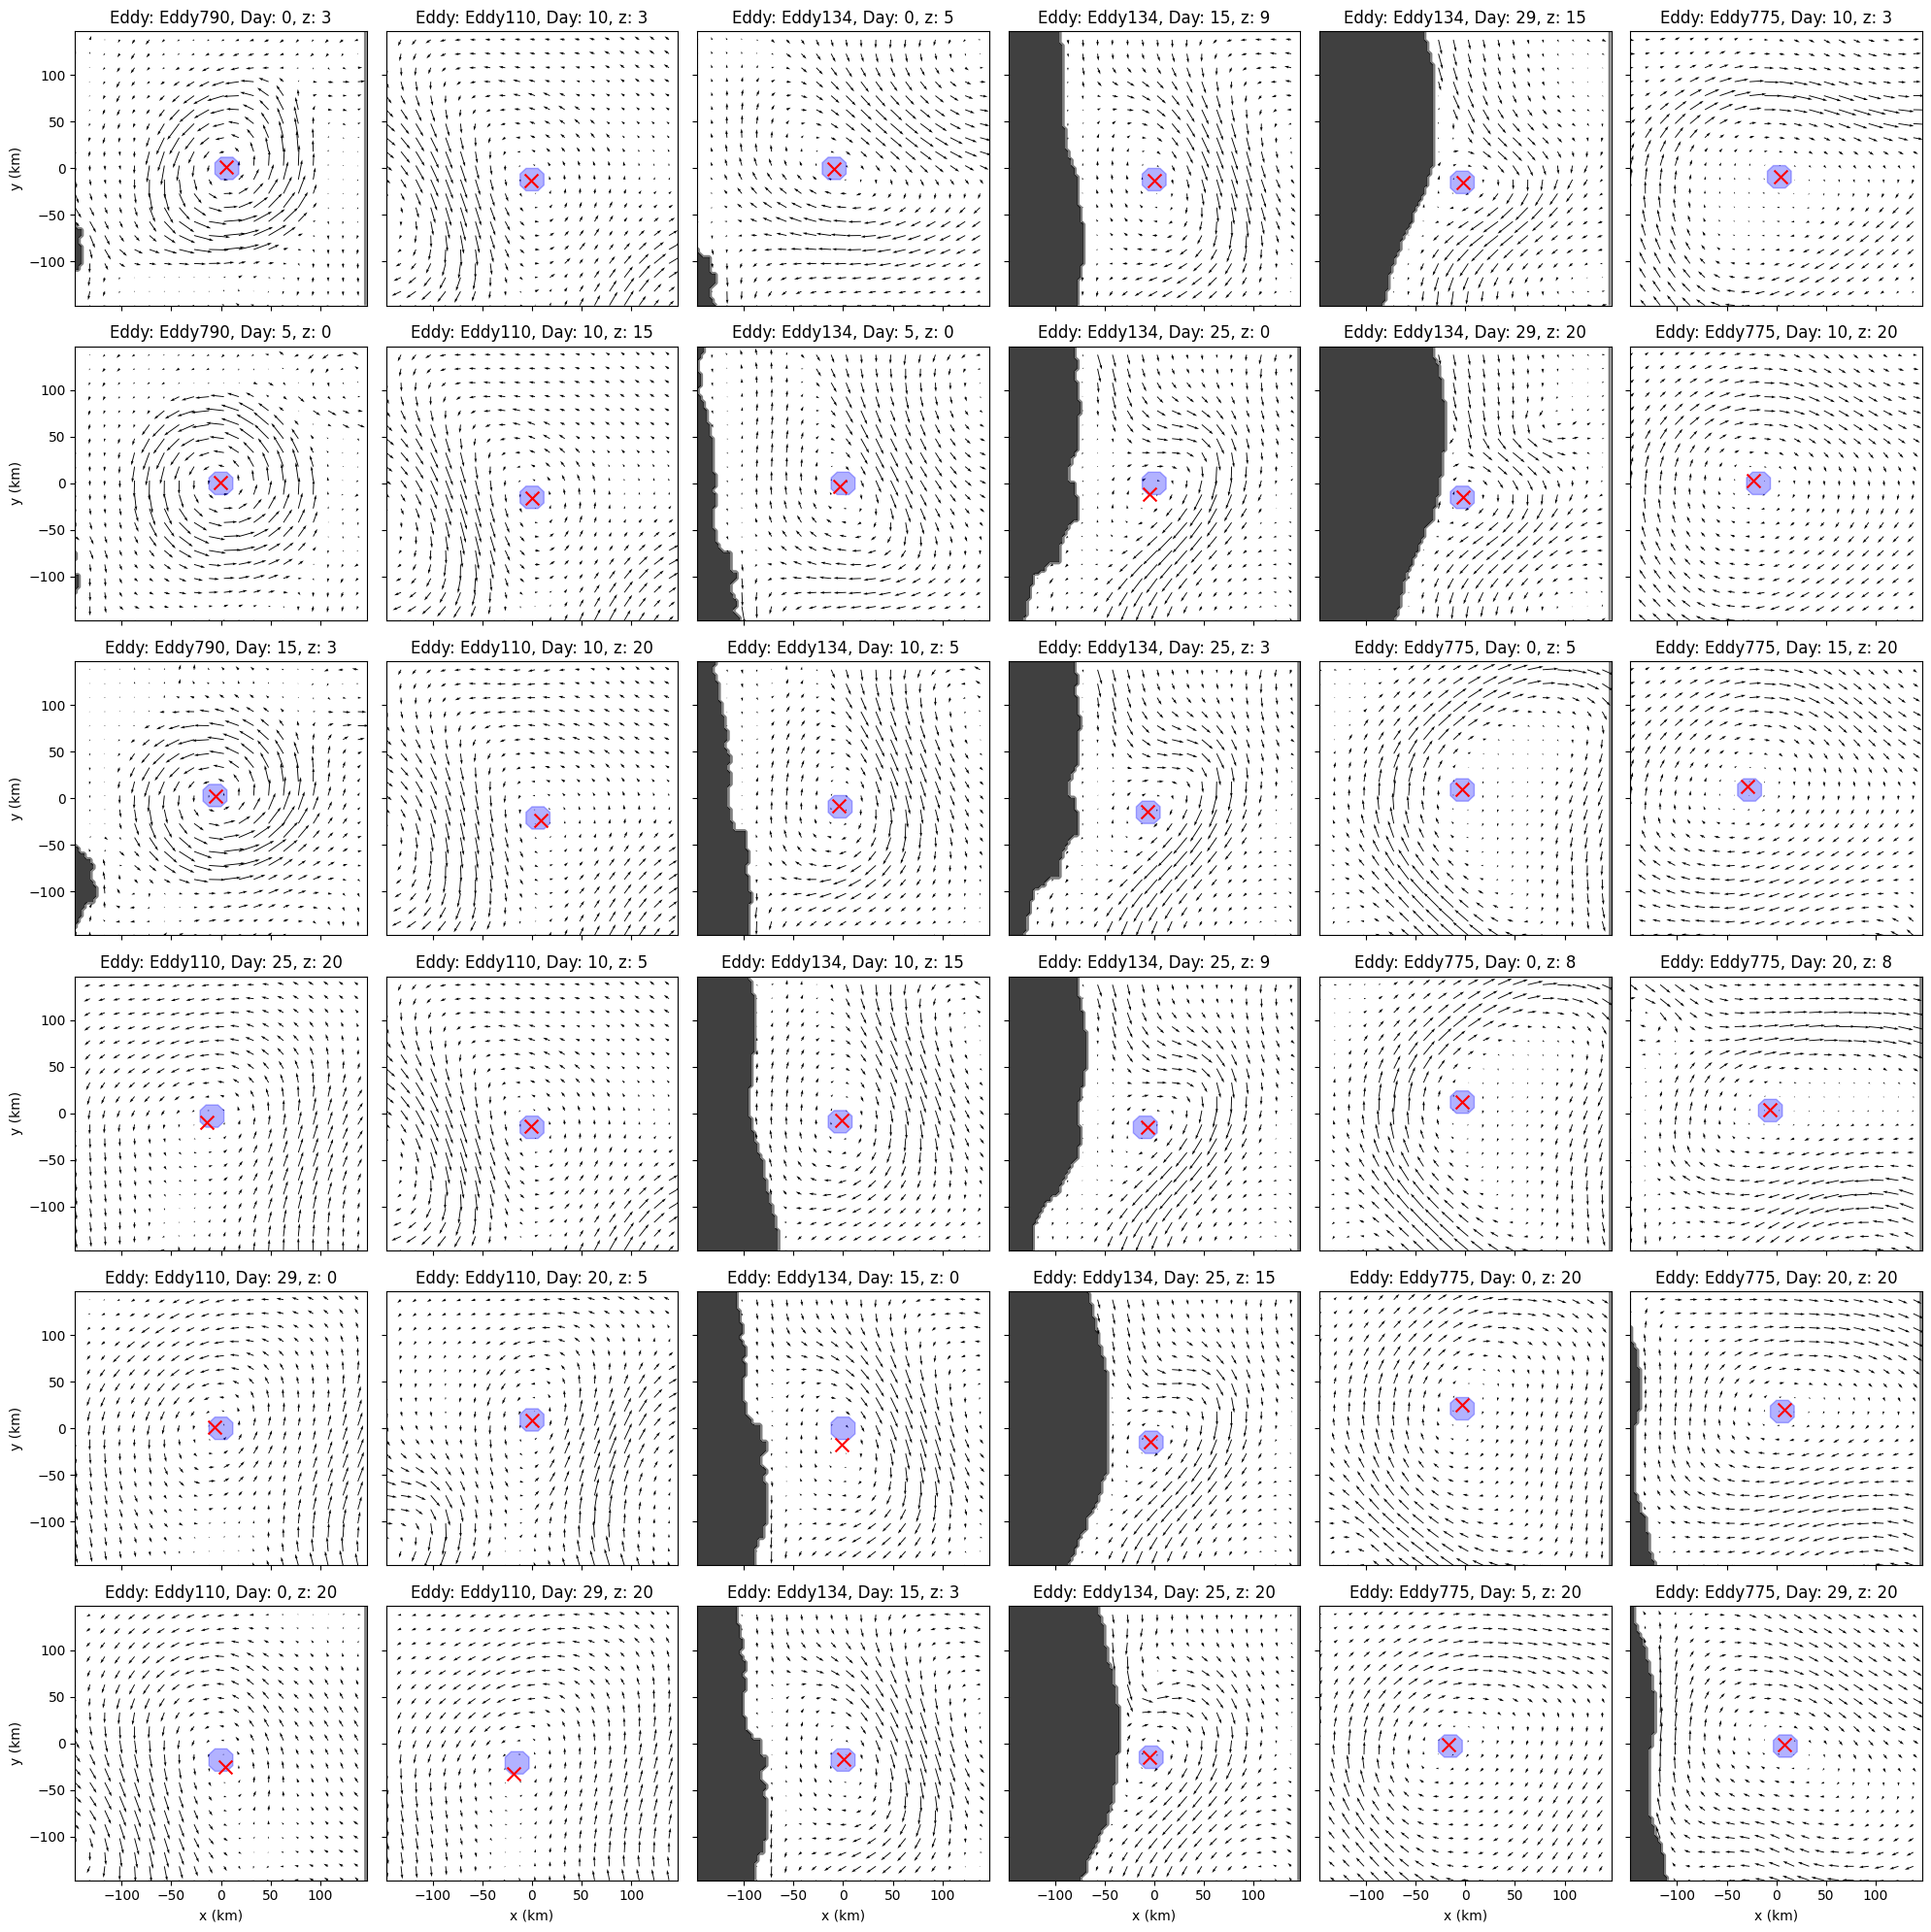

In [19]:
from scipy.spatial import ConvexHull

rows, cols = 6, 6

fig, axs = plt.subplots(rows, cols, figsize=(20, 20), sharey=True, sharex=True)

for k in range(len(df_show_offs)):

    ax = axs[k % rows, k//rows]

    df_rel = df_show_offs.iloc[k]
    eddy, t, depth_lvl = df_rel['Eddy'], df_rel['Day'], df_rel['z']

    u = sample_data[eddy]['T'+str(t)]['U'][:, :, depth_lvl]
    v = sample_data[eddy]['T'+str(t)]['V'][:, :, depth_lvl]
    
    x, y = sample_data[eddy]['T'+str(t)]['x']/1000, sample_data[eddy]['T'+str(t)]['y']/1000
    X, Y, dx = *np.meshgrid(x, y), x[1]-x[0]
    
    spacing = 5
    ax.quiver(X[::spacing, ::spacing], Y[::spacing, ::spacing], u[::spacing, ::spacing].T, v[::spacing, ::spacing].T)

    df_rel = df_MOCA[(df_MOCA['Eddy']==eddy) & (df_MOCA['Day']==t) & (df_MOCA['z']==depth_lvl)]

    xc, yc, nic, njc, depth, w = df_rel['xc'], df_rel['yc'], df_rel['nic'], df_rel['njc'], df_rel['Depth'], df_rel['w']

    # ax.plot([X[nic-r, njc], X[nic+r, njc]], [Y[nic-r, njc], Y[nic+r, njc]], 'b', zorder=3)
    # ax.plot([X[nic, njc-r], X[nic, njc+r]], [Y[nic, njc-r], Y[nic, njc+r]], 'b', zorder=3)

    # mask = (np.hypot(X - X[nic, njc], Y - Y[nic, njc]) < 10).T
    # ax.scatter(X[mask], Y[mask], c='b')

    mask = (np.hypot(X - X[nic, njc], Y - Y[nic, njc]) < r*dx).T
    points = np.column_stack((X[mask], Y[mask]))
    
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], color='b', alpha=0.3)
    
    ax.scatter(xc, yc, marker='x', s=100, color='r', zorder=4)

    if np.any(np.isnan(u)):
        nan_mask = np.isnan(u)
        mask = np.where(~np.isnan(u), np.nan, 0)
        ax.contourf(X, Y, mask.T, cmap='gray', zorder=-1)
        ax.contour(X, Y, nan_mask.T, colors='k', linewidths=2, alpha=.5)

    ax.set_title(f'Eddy: {eddy}, Day: {t}, z: {depth_lvl}')
    
    if k % rows == rows - 1:
        ax.set_xlabel('x (km)')
    if k < rows:
        ax.set_ylabel('y (km)')

    # ax.axis('equal')

plt.tight_layout()
plt.show()